In [1]:
!pip install pandas numpy matplotlib statsmodels


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [5]:
import os

In [47]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, index_col='Month', parse_dates=True)

In [49]:
df.index.freq = 'MS'

In [51]:
df.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


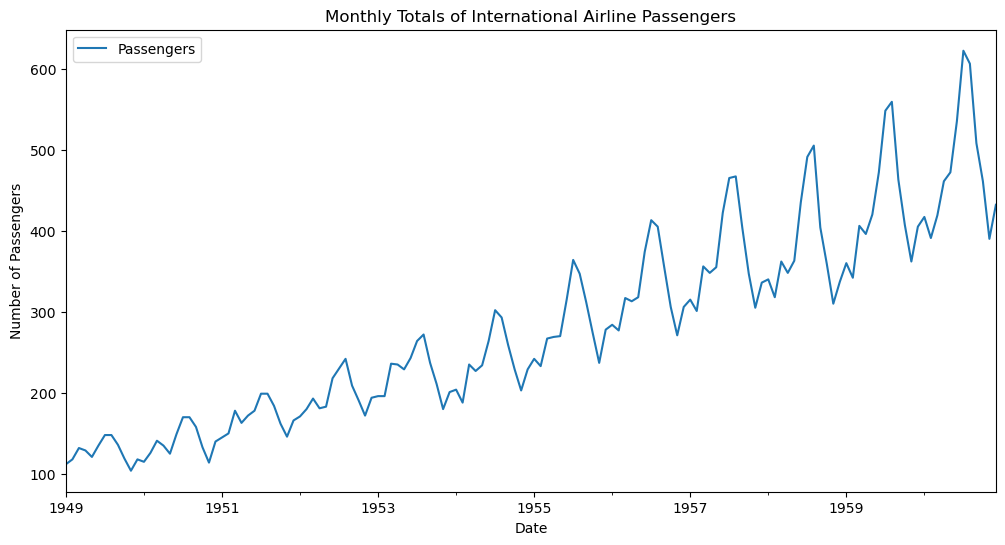

In [83]:
df.plot(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Monthly Totals of International Airline Passengers')
plt.show()


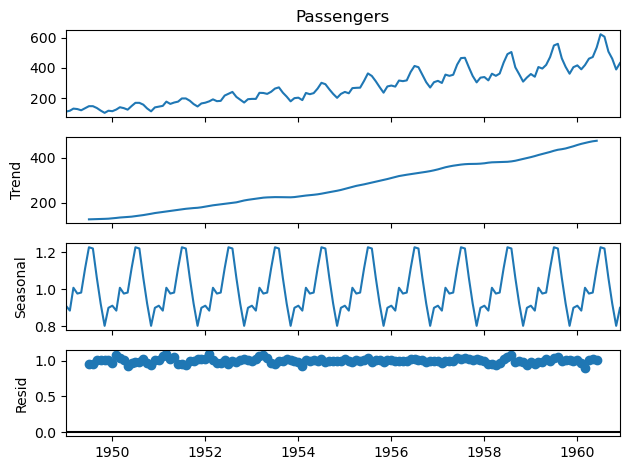

In [85]:
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative')
decomposition.plot()
plt.show()


In [86]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: 0.8153688792060547
p-value: 0.9918802434376411


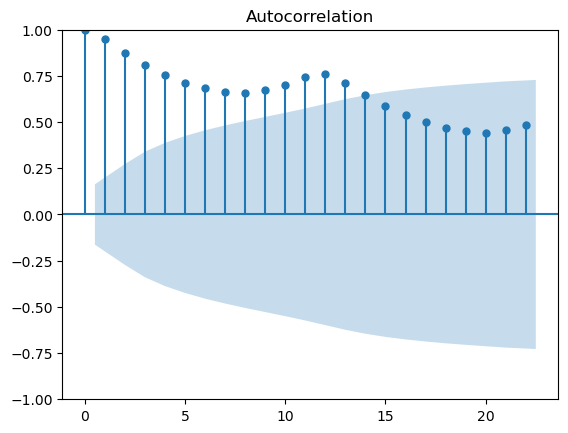

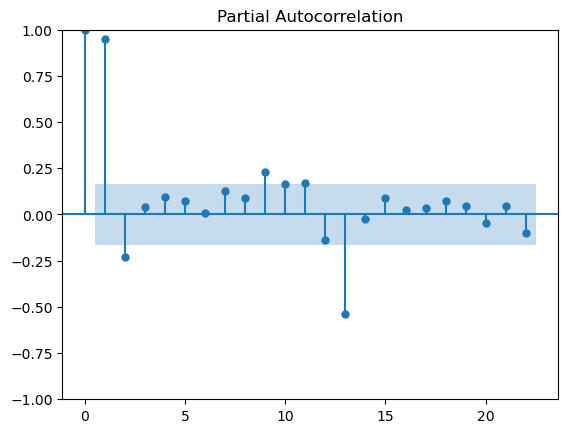

In [89]:
plot_acf(df['Passengers'])
plot_pacf(df['Passengers'])
plt.show()


In [91]:
p = 2
d = 1
q = 2


In [93]:
arima_model = ARIMA(df['Passengers'], order=(p, d, q))
arima_result = arima_model.fit()

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [95]:
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Fri, 21 Jun 2024   AIC                           1353.347
Time:                        17:30:56   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.060      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.819      0.0

In [97]:
forecast = arima_result.get_forecast(steps=12)
forecast_df = forecast.conf_int()
forecast_df['Predictions'] = arima_result.predict(start=forecast_df.index[0], end=forecast_df.index[-1])


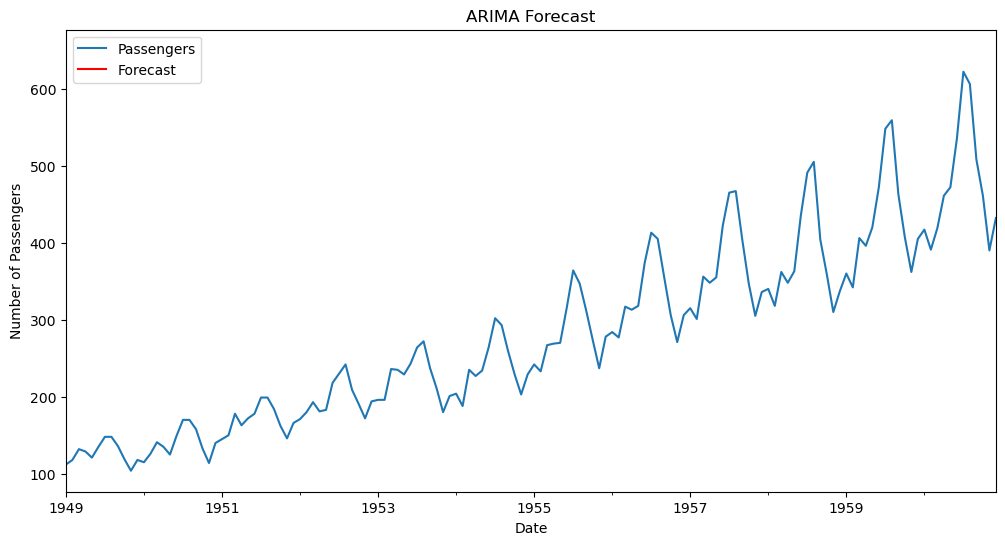

In [99]:
df.plot(figsize=(12, 6))
plt.plot(forecast_df['Predictions'], color='red', label='Forecast')
plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='pink')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [101]:
p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
s = 12  

In [103]:
sarima_model = SARIMAX(df['Passengers'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit()

In [104]:
print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Fri, 21 Jun 2024   AIC                           1022.299
Time:                                    17:30:58   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.358      0.721      -0.825       0.570
ma.L1         -0.2148      0.325   

In [107]:
forecast_sarima = sarima_result.get_forecast(steps=12)
forecast_sarima_df = forecast_sarima.conf_int()
forecast_sarima_df['Predictions'] = sarima_result.predict(start=forecast_sarima_df.index[0], end=forecast_sarima_df.index[-1])


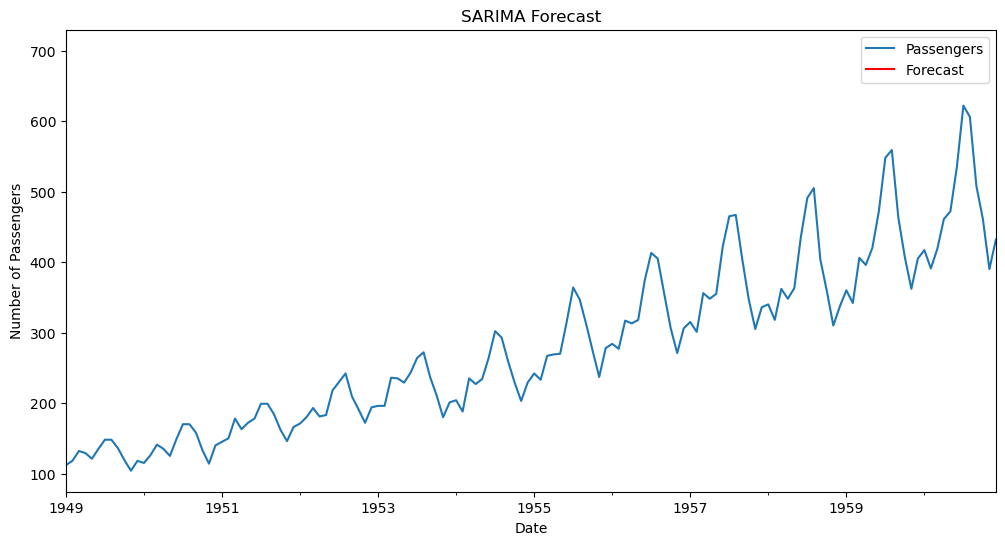

In [109]:
df.plot(figsize=(12, 6))
plt.plot(forecast_sarima_df['Predictions'], color='red', label='Forecast')
plt.fill_between(forecast_sarima_df.index, forecast_sarima_df.iloc[:, 0], forecast_sarima_df.iloc[:, 1], color='pink')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

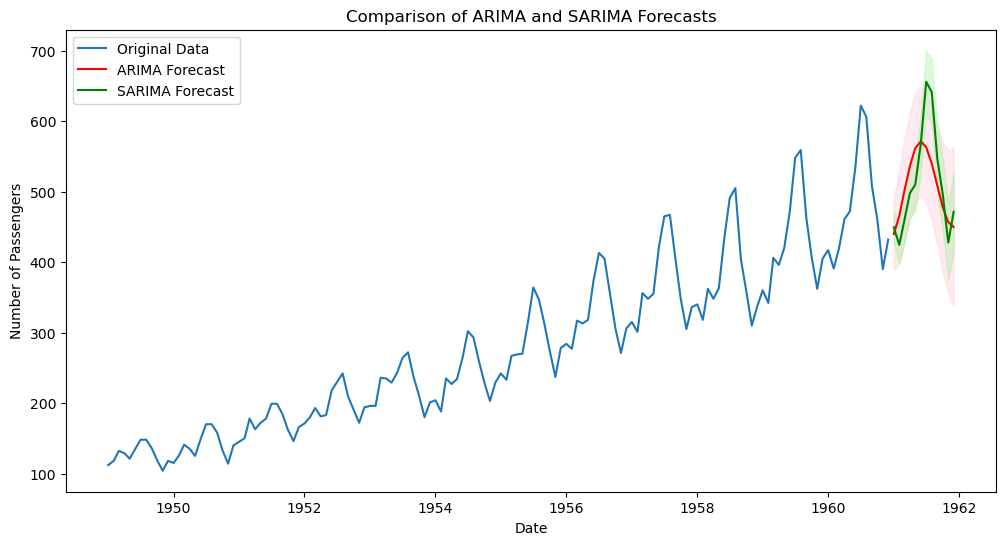

In [111]:

plt.figure(figsize=(12, 6))
plt.plot(df, label='Original Data')


plt.plot(forecast_df['Predictions'], color='red', label='ARIMA Forecast')
plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='pink', alpha=0.3)


plt.plot(forecast_sarima_df['Predictions'], color='green', label='SARIMA Forecast')
plt.fill_between(forecast_sarima_df.index, forecast_sarima_df.iloc[:, 0], forecast_sarima_df.iloc[:, 1], color='lightgreen', alpha=0.3)


plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Comparison of ARIMA and SARIMA Forecasts')
plt.legend()
plt.show()
